In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

adata = sc.read('/dfs/project/perturb-gnn/datasets/Norman2019_hvg+perts.h5ad')

In [8]:
genename2ensembl = dict(zip(adata.var.gene_name.values, adata.var.index.values))
ensembl2genename = dict(zip(adata.var.index.values, adata.var.gene_name.values))

In [4]:
' '.join(adata.var.index.values)

'ENSG00000239945 ENSG00000223764 ENSG00000187634 ENSG00000187642 ENSG00000188290 ENSG00000187608 ENSG00000273443 ENSG00000237330 ENSG00000223823 ENSG00000205231 ENSG00000186891 ENSG00000186827 ENSG00000169962 ENSG00000235098 ENSG00000189409 ENSG00000269737 ENSG00000169885 ENSG00000271806 ENSG00000234396 ENSG00000149527 ENSG00000272449 ENSG00000238164 ENSG00000157873 ENSG00000215912 ENSG00000078900 ENSG00000235169 ENSG00000272153 ENSG00000116254 ENSG00000225077 ENSG00000158292 ENSG00000069812 ENSG00000187017 ENSG00000173662 ENSG00000270171 ENSG00000049249 ENSG00000232912 ENSG00000228423 ENSG00000074800 ENSG00000131686 ENSG00000180758 ENSG00000228526 ENSG00000234546 ENSG00000049239 ENSG00000179840 ENSG00000280113 ENSG00000142657 ENSG00000175262 ENSG00000277726 ENSG00000009724 ENSG00000271895 ENSG00000116649 ENSG00000162490 ENSG00000177000 ENSG00000162493 ENSG00000175147 ENSG00000233485 ENSG00000228140 ENSG00000142634 ENSG00000142615 ENSG00000215704 ENSG00000271742 ENSG00000224621 ENSG000

In [38]:
df_gene2go

,gene_id,isomap:M202110184ABAA9BC7178C81CEBC9459510EDDEA3238F5EY,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),Gene ontology (GO),Gene ontology IDs,Ensembl transcript,yourlist:M202110066320BA52A5CE8FCD097CB85A53697A35221FC0A
0,ENSG00000187634,ENSG00000187634 -> Q96NU1-3,Q96NU1,SAM11,reviewed,Sterile alpha motif domain-containing protein ...,SAMD11,Homo sapiens (Human),681,"negative regulation of transcription, DNA-temp...",nucleus [GO:0005634],chromatin binding [GO:0003682]; histone bindin...,nucleus [GO:0005634]; chromatin binding [GO:00...,GO:0003682; GO:0005634; GO:0042393; GO:0045892,ENST00000342066 [Q96NU1-3];,NaN
1,ENSG00000187642,ENSG00000187642 -> Q5SV97-1;Q5SV97-3,Q5SV97,PERM1,reviewed,PGC-1 and ERR-induced regulator in muscle prot...,PERM1 C1orf170,Homo sapiens (Human),790,"regulation of transcription, DNA-templated [GO...",cytoplasm [GO:0005737]; nucleus [GO:0005634],NaN,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,GO:0005634; GO:0005737; GO:0006355; GO:0014850,ENST00000341290 [Q5SV97-3];ENST00000433179 [Q5...,NaN
2,ENSG00000188290,NaN,Q9HCC6,HES4,reviewed,Transcription factor HES-4 (hHES4) (Class B ba...,HES4 BHLHB42,Homo sapiens (Human),221,anterior/posterior pattern specification [GO:0...,chromatin [GO:0000785]; nucleus [GO:0005634],"DNA-binding transcription factor activity, RNA...",chromatin [GO:0000785]; nucleus [GO:0005634]; ...,GO:0000785; GO:0000978; GO:0000981; GO:0005634...,ENST00000304952;,NaN
3,ENSG00000187608,NaN,P05161,ISG15,reviewed,Ubiquitin-like protein ISG15 (Interferon-induc...,ISG15 G1P2 UCRP,Homo sapiens (Human),165,defense response to bacterium [GO:0042742]; de...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,integrin binding [GO:0005178]; protein tag [GO...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,GO:0005178; GO:0005576; GO:0005634; GO:0005654...,ENST00000649529;,NaN
4,ENSG00000237330,NaN,E7ERA6,RN223,reviewed,RING finger protein 223,RNF223,Homo sapiens (Human),249,NaN,integral component of membrane [GO:0016021],metal ion binding [GO:0046872],integral component of membrane [GO:0016021]; m...,GO:0016021; GO:0046872,ENST00000453464;,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,ENSG00000212907,NaN,P03901,NU4LM,reviewed,NADH-ubiquinone oxidoreductase chain 4L (EC 7....,MT-ND4L MTND4L NADH4L ND4L,Homo sapiens (Human),98,"mitochondrial electron transport, NADH to ubiq...",integral component of membrane [GO:0016021]; m...,NADH dehydrogenase (ubiquinone) activity [GO:0...,integral component of membrane [GO:0016021]; m...,GO:0005743; GO:0005747; GO:0006120; GO:0008137...,ENST00000361335;,NaN
3196,ENSG00000198886,NaN,P03905,NU4M,reviewed,NADH-ubiquinone oxidoreductase chain 4 (EC 7.1...,MT-ND4 MTND4 NADH4 ND4,Homo sapiens (Human),459,aerobic respiration [GO:0009060]; aging [GO:00...,integral component of membrane [GO:0016021]; m...,NADH dehydrogenase (ubiquinone) activity [GO:0...,integral component of membrane [GO:0016021]; m...,GO:0001666; GO:0001701; GO:0005743; GO:0005747...,ENST00000361381;,NaN
3197,ENSG00000198786,NaN,P03915,NU5M,reviewed,NADH-ubiquinone oxidoreductase chain 5 (EC 7.1...,MT-ND5 MTND5 NADH5 ND5,Homo sapiens (Human),603,electron transport coupled proton transport [G...,integral component of membrane [GO:0016021]; m...,NADH dehydrogenase (ubiquinone) activity [GO:0...,integral component of membrane [GO:0016021]; m...,GO:0001666; GO:0003954; GO:0005743; GO:0005747...,ENST00000361567;,NaN
3198,ENSG00000198695,NaN,P03923,NU6M,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Homo sapiens (Human),174,"mitochondrial electron transport, NADH to ubiq...",integral component of membrane [GO:0016021]; m...,NADH dehydrogenase (ubiquinone) activity [GO:0...,integral component of membrane [GO:0016021]; m...,GO:0005743; GO:0006120; GO:0008137; GO:0016021...,ENST00000361681;,NaN


In [9]:
df_gene2go = pd.read_csv('ensembl_go_norman.tab', sep = '\t')
df_gene2go['Entry name'] = df_gene2go['Entry name'].apply(lambda x: x.split('_')[0])

In [10]:
len(np.intersect1d(df_gene2go['Entry name'].values, np.unique(adata.var.gene_name.values)))

1473

In [14]:
df_gene2go = df_gene2go[df_gene2go['Gene ontology IDs'].notnull()]
df_gene2go = df_gene2go.rename(columns = {'yourlist:M202110184ABAA9BC7178C81CEBC9459510EDDEA3238F5EY': 'gene_id'})

In [15]:
geneid2go = dict(df_gene2go[['gene_id', 'Gene ontology IDs']].values)

In [18]:
len(np.intersect1d(df_gene2go.gene_id.unique(),adata.var.index.values))

3067

In [20]:
geneid2go['ENSG00000274290,ENSG00000273802']

'GO:0000786; GO:0002227; GO:0003677; GO:0005615; GO:0005634; GO:0005654; GO:0005829; GO:0006334; GO:0016567; GO:0019731; GO:0042802; GO:0046982; GO:0050830; GO:0061844; GO:0070062'

In [22]:
'ENSG00000273802' in adata.var.index.values

True

In [23]:
gene2go = {}
for i,j in geneid2go.items():
    j = [k.strip() for k in j.split(';')]
    for k in i.split(','):
        gene2go[ensembl2genename[k]] = j

In [25]:
len(gene2go)

3074

In [26]:
unique_perturbs = []
for i in adata.obs.condition.unique():
    if '+' in i:
        unique_perturbs.append(i.split('+')[0])
        unique_perturbs.append(i.split('+')[1])

In [28]:
unique_perturbs = np.unique(unique_perturbs)

In [30]:
len(unique_perturbs)

106

In [31]:
len(np.intersect1d(list(gene2go.keys()), unique_perturbs))

103

In [33]:
np.setdiff1d(unique_perturbs, list(gene2go.keys()))

array(['IER5L', 'SAMD1', 'ctrl'], dtype='<U8')

In [34]:
gene2go

{'SAMD11': ['GO:0003682', 'GO:0005634', 'GO:0042393', 'GO:0045892'],
 'PERM1': ['GO:0005634', 'GO:0005737', 'GO:0006355', 'GO:0014850'],
 'HES4': ['GO:0000785',
  'GO:0000978',
  'GO:0000981',
  'GO:0005634',
  'GO:0006357',
  'GO:0007399',
  'GO:0008134',
  'GO:0009952',
  'GO:0030154',
  'GO:0046983'],
 'ISG15': ['GO:0005178',
  'GO:0005576',
  'GO:0005634',
  'GO:0005654',
  'GO:0005737',
  'GO:0005829',
  'GO:0007229',
  'GO:0009615',
  'GO:0016032',
  'GO:0019941',
  'GO:0019985',
  'GO:0022627',
  'GO:0030501',
  'GO:0031386',
  'GO:0031397',
  'GO:0031625',
  'GO:0032020',
  'GO:0032480',
  'GO:0032649',
  'GO:0032729',
  'GO:0032733',
  'GO:0034340',
  'GO:0042742',
  'GO:0045071',
  'GO:0045648',
  'GO:0051607',
  'GO:0060337',
  'GO:0060339'],
 'RNF223': ['GO:0016021', 'GO:0046872'],
 'TNFRSF18': ['GO:0002687',
  'GO:0005031',
  'GO:0005576',
  'GO:0005886',
  'GO:0005887',
  'GO:0006915',
  'GO:0007165',
  'GO:0009897',
  'GO:0033209',
  'GO:0042531',
  'GO:0043066',
  'GO:0

In [37]:
np.setdiff1d(adata.var.gene_name.values, list(gene2go.keys()))[:1000]

array(['A2M-AS1', 'AATBC', 'ABC11-4932300O16.1', 'ABC12-49244600F4.4',
       'ABHD11-AS1', 'AC002117.1', 'AC002331.1', 'AC002451.3',
       'AC002456.2', 'AC002463.3', 'AC002511.2', 'AC003088.1',
       'AC003092.1', 'AC003101.1', 'AC004051.2', 'AC004156.3',
       'AC004158.3', 'AC004221.2', 'AC004490.1', 'AC004540.4',
       'AC004540.5', 'AC004593.3', 'AC004702.2', 'AC004754.3',
       'AC004791.2', 'AC004824.2', 'AC004878.8', 'AC004895.4',
       'AC005009.1', 'AC005150.1', 'AC005197.2', 'AC005264.2',
       'AC005281.2', 'AC005330.2', 'AC005477.1', 'AC005481.5',
       'AC005540.3', 'AC005592.1', 'AC005616.2', 'AC005618.6',
       'AC005754.8', 'AC005808.3', 'AC005932.1', 'AC005954.4',
       'AC006042.7', 'AC006126.3', 'AC006129.2', 'AC006262.4',
       'AC006262.5', 'AC006273.5', 'AC006378.2', 'AC006449.2',
       'AC006547.15', 'AC006942.4', 'AC007038.7', 'AC007064.24',
       'AC007131.1', 'AC007192.6', 'AC007193.6', 'AC007193.8',
       'AC007193.9', 'AC007246.3', 'AC007277.

In [41]:
from tqdm import tqdm
edge_list = []
for g1 in tqdm(gene2go.keys()):
    for g2 in gene2go.keys():
        edge_list.append((g1, g2, len(np.intersect1d(gene2go[g1], gene2go[g2]))/len(np.union1d(gene2go[g1], gene2go[g2]))))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3074/3074 [07:56<00:00,  6.45it/s]


In [43]:
edge_list_filter = [i for i in edge_list if i[2] > 0]

In [44]:
len(edge_list_filter)

4020156

<AxesSubplot:ylabel='Density'>

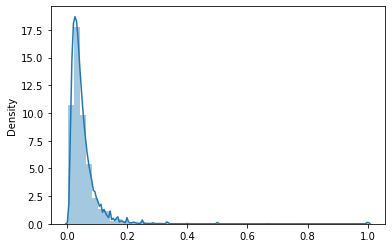

In [45]:
import seaborn as sns
sns.distplot([i[2] for i in edge_list_filter])

In [53]:
len([i for i in edge_list if i[2] > 0.1])

331266

In [50]:
further_filter = [i for i in edge_list if i[2] > 0.1]

<AxesSubplot:ylabel='Density'>

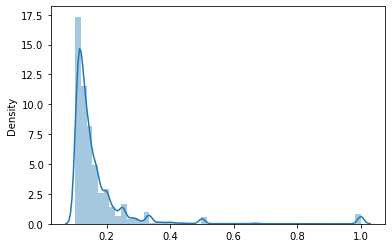

In [52]:
sns.distplot([i[2] for i in further_filter])

In [56]:
df_edge_list = pd.DataFrame(further_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})

In [61]:
dict(df_edge_list.gene1.value_counts())

{'DEF6': 657,
 'DPCR1': 621,
 'C19orf33': 602,
 'CDCP1': 545,
 'ZNF397': 518,
 'GSG1': 489,
 'PTPRE': 484,
 'SIRPB2': 481,
 'SMIM9': 481,
 'IFITM10': 481,
 'SUSD3': 481,
 'C14orf180': 481,
 'GPR85': 467,
 'ADGRG2': 465,
 'PRRG4': 463,
 'GPR153': 459,
 'GPR82': 459,
 'SH3BGRL': 457,
 'GLIPR1': 452,
 'ADGRD1': 452,
 'IRF2BP2': 450,
 'RHBDL2': 449,
 'EDC4': 448,
 'LYPD3': 445,
 'FAM209A': 444,
 'GCA': 444,
 'THSD7B': 441,
 'BRI3': 439,
 'CSMD3': 437,
 'TAS1R1': 435,
 'ICAM4': 433,
 'OR3A1': 429,
 'OR1F1': 429,
 'ORAI3': 429,
 'MS4A4A': 427,
 'SMIM1': 426,
 'ZNF425': 425,
 'PRTG': 422,
 'GYPA': 418,
 'SVEP1': 418,
 'CD82': 418,
 'ISLR2': 418,
 'OR5V1': 417,
 'OR51E1': 417,
 'OR6C76': 417,
 'OR2L13': 417,
 'OR2T4': 417,
 'OR2L2': 417,
 'XK': 416,
 'ADGRE3': 416,
 'TMEM219': 414,
 'GRAP2': 414,
 'P2RY14': 413,
 'ENPP5': 413,
 'C1orf210': 409,
 'LRRC25': 408,
 'ODF4': 408,
 'TRAF3IP3': 407,
 'FAM84B': 406,
 'PILRA': 405,
 'SKAP2': 403,
 'FILIP1L': 401,
 'TM4SF5': 401,
 'SLC44A5': 400,
 'CD101

In [88]:
df_edge_list.to_csv('gene_sim_jc_filter.csv', index = False)

In [62]:
len(df_edge_list.gene1.unique())

3074

In [63]:
df_edge_list_all = pd.DataFrame(edge_list_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})


In [78]:
df_knn = df_edge_list_all.groupby('gene2').apply(lambda x: x.nlargest(11,['score'])).reset_index(drop = True)

<AxesSubplot:ylabel='Density'>

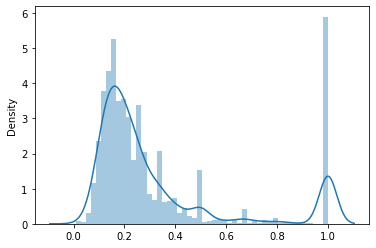

In [83]:
sns.distplot(df_knn.score.values)

In [85]:
df_knn.gene2.value_counts()

A2M        11
PJA2       11
PIK3R1     11
PILRA      11
PIM1       11
           ..
CT45A3      3
ACTL10      3
FAM135B     3
FAM183A     2
ALLC        1
Name: gene2, Length: 3074, dtype: int64

In [87]:
df_knn.to_csv('gene_sim_knn.csv', index = False)